In [4]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

X, y = load_diabetes(return_X_y=True)
X = X[:, [2]]  # Use only one feature
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=20, shuffle=False)

In [5]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression().fit(X_train, y_train)

In [6]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = regressor.predict(X_test)

print(f"Mean squared error: {mean_squared_error(y_test, y_pred):.2f}")
print(f"Coefficient of determination: {r2_score(y_test, y_pred):.2f}")

Mean squared error: 2548.07
Coefficient of determination: 0.47


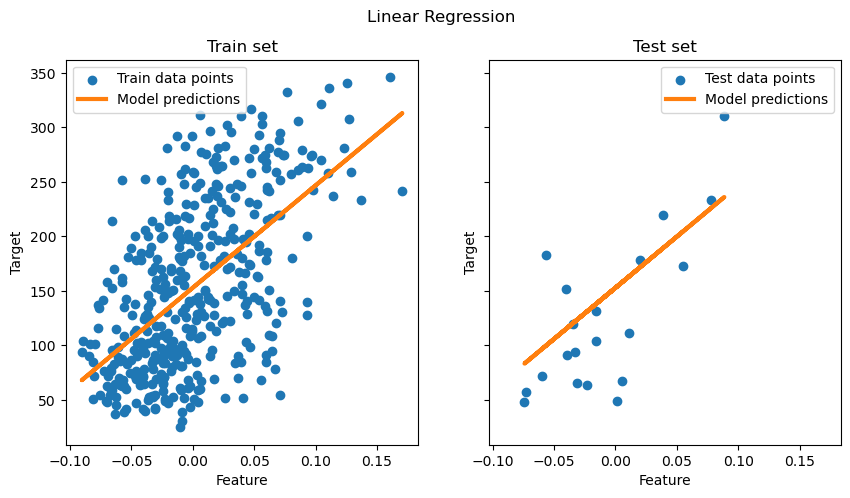

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(ncols=2, figsize=(10, 5), sharex=True, sharey=True)

ax[0].scatter(X_train, y_train, label="Train data points")
ax[0].plot(
    X_train,
    regressor.predict(X_train),
    linewidth=3,
    color="tab:orange",
    label="Model predictions",
)
ax[0].set(xlabel="Feature", ylabel="Target", title="Train set")
ax[0].legend()

ax[1].scatter(X_test, y_test, label="Test data points")
ax[1].plot(X_test, y_pred, linewidth=3, color="tab:orange", label="Model predictions")
ax[1].set(xlabel="Feature", ylabel="Target", title="Test set")
ax[1].legend()

fig.suptitle("Linear Regression")

plt.show()

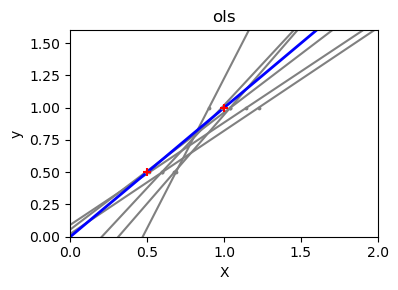

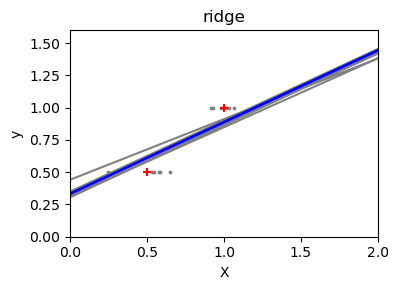

In [8]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import linear_model

X_train = np.c_[0.5, 1].T
y_train = [0.5, 1]
X_test = np.c_[0, 2].T

np.random.seed(0)

classifiers = dict(
    ols=linear_model.LinearRegression(), ridge=linear_model.Ridge(alpha=0.1)
)

for name, clf in classifiers.items():
    fig, ax = plt.subplots(figsize=(4, 3))

    for _ in range(6):
        this_X = 0.1 * np.random.normal(size=(2, 1)) + X_train
        clf.fit(this_X, y_train)

        ax.plot(X_test, clf.predict(X_test), color="gray")
        ax.scatter(this_X, y_train, s=3, c="gray", marker="o", zorder=10)

    clf.fit(X_train, y_train)
    ax.plot(X_test, clf.predict(X_test), linewidth=2, color="blue")
    ax.scatter(X_train, y_train, s=30, c="red", marker="+", zorder=10)

    ax.set_title(name)
    ax.set_xlim(0, 2)
    ax.set_ylim((0, 1.6))
    ax.set_xlabel("X")
    ax.set_ylabel("y")

    fig.tight_layout()

plt.show()